In [1]:
import numpy as np
from scipy.misc import imread

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.palettes import Greys9, Greys3

from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.



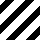
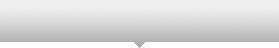
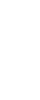
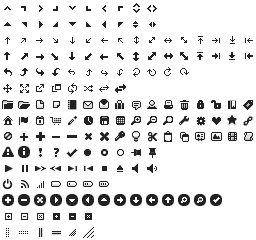
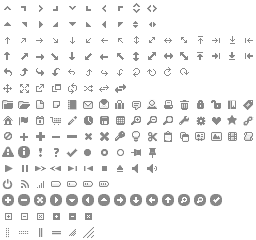
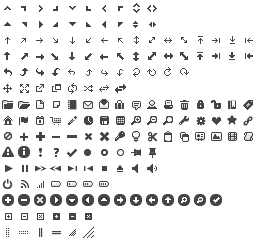
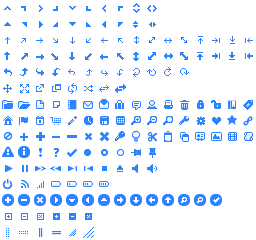
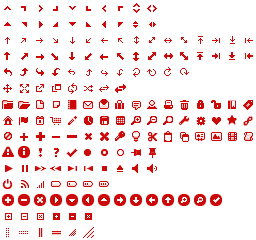
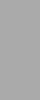
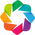
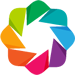
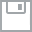
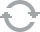
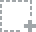
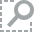
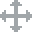
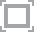
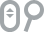

In [2]:
output_notebook()

In [3]:
TOOLS="pan, box_zoom, reset, save"

# The image is this one: https://windycitizensports.files.wordpress.com/2011/10/baboon.jpg?w=595
RGB_image = imread('/Users/curt/Downloads/BaboonRGB.jpg')

nx, ny, n_colors = RGB_image.shape

source = ColumnDataSource(data={'image': RGB_image[:, :, 0]})

p = figure(title="Single-color slice of RGB image", 
           tools=TOOLS, 
           x_range=[0, nx], 
           y_range=[0, ny],
          )

In [4]:
# This is really slow; not sure if it is a bokeh problem or a problem with my code.

def update(color=0):
    global RGB_image
    source.data['image'] = RGB_image[:, :, color]
    p.image([source.data['image'][::-1, :]],
        x=0, 
        y=0, 
        dh=[ny], 
        dw=[nx], 
        palette=Greys9,
        source = source
        )
    show(p)

    
interact(update, color=(0, 2))

<function __main__.update>